# Density

In [1]:
## Import libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from  statsmodels.distributions.empirical_distribution import ECDF

## Cumulative Density Curves

In [2]:
# Import data
data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/raw/main/data/DensityCDF.dta")

## retreive features

mean_revenue = data.groupby(['post']).mean().revenue
data['mean_revenue'] = np.where(data.post == 0, mean_revenue[0], mean_revenue[1])
data.sort_values(by = 'revenue', inplace = True)

C:\Users\Jhon\AppData\Local\Temp\ipykernel_13960\3985100839.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['revenue1'] = ecdf0(data0['revenue'])
C:\Users\Jhon\AppData\Local\Temp\ipykernel_13960\3985100839.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['revenue1'] = ecdf1(data1['revenue'])


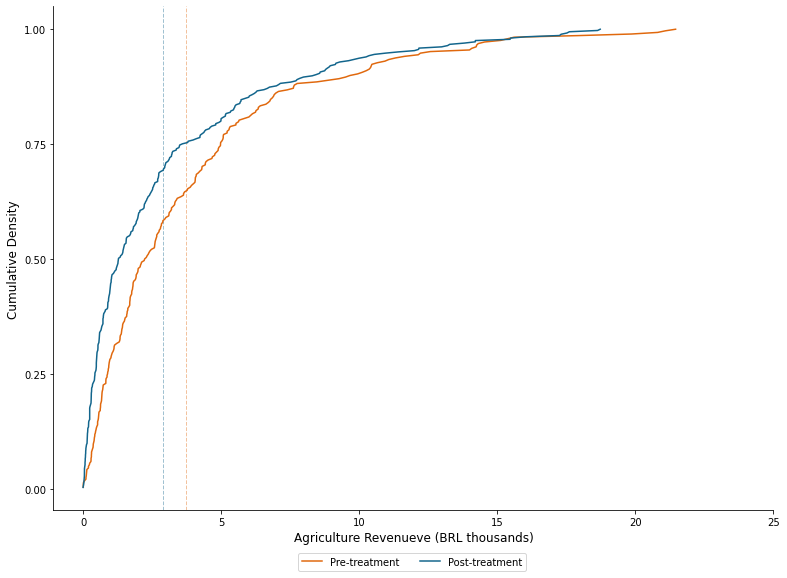

In [3]:
## Plot

fig = plt.figure(figsize = (10, 7), facecolor = "white")

ax = fig.add_axes([.1, 1, 1, 1])
data0 = data[data.post == 0]
data1 = data[data.post == 1]

ecdf0 =  ECDF(data0.revenue)
ecdf1 =  ECDF(data1.revenue)

colors = ["#e0680d", "#12658c"]

data0['revenue1'] = ecdf0(data0['revenue'])
data1['revenue1'] = ecdf1(data1['revenue'])

omit = ['top', 'right']

## Plot vertical lines
ax.axvline(mean_revenue[1], linestyle = "--", color = colors[0], alpha = .4, lw = 1)
ax.axvline(mean_revenue[0], linestyle = "--", color = colors[1], alpha = .4, lw = 1)
## Plot cumulative density curves
ax.plot("revenue", "revenue1", data = data1, color = colors[0],label = "Pre-treatment")
ax.plot("revenue", "revenue1", data = data0, color = colors[1],label = "Post-treatment")
## aesthetic
### legend
ax.legend( loc = (.34, -.12), ncol = 2)
### Axis
ax.set_xlabel("Agriculture Revenueve (BRL thousands)", size = 12)
ax.set_ylabel("Cumulative Density", size = 12)
ax.set_yticks(np.arange(0, 1.1, .25))
ax.set_xticks(np.arange(0, 25.1, 5))
ax.spines[omit].set_visible(False)
# plt.savefig("../figs/02density_01.png", dpi = 400)

## Density Plots

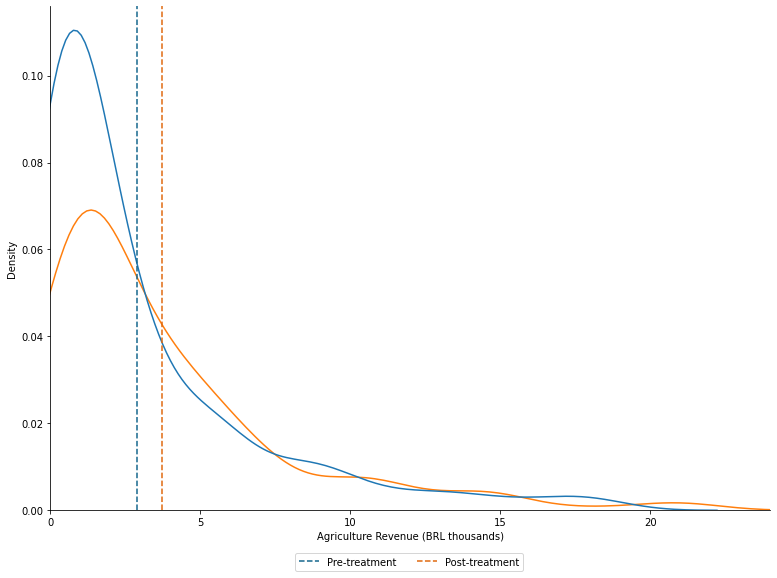

In [4]:
## Working with the same data
fig = plt.figure(figsize=(10, 7), facecolor="white")
ax = fig.add_axes([.1, 1, 1, 1])
omit = ['top', 'right']

## Density
sns.kdeplot(data=data, x="revenue", hue = "post", legend = False)
## Vertical line
ax.axvline(mean_revenue[0], linestyle = "--", color = colors[1], label = "Pre-treatment")
ax.axvline(mean_revenue[1], linestyle = "--", color = colors[0], label = "Post-treatment")
## aesthetic
# ax.legend()
ax.legend( loc = (.34, -.12), ncol = 2)
ax.set_xlabel("Agriculture Revenue (BRL thousands)")
ax.set_xlim(0, 24)
ax.spines[omit].set_visible(False)

# plt.savefig("../figs/02density_02.png", dpi = 500)

## Ridge lines with groups

In [5]:
# Import data
data = pd.read_stata("https://github.com/d2cml-ai/python_visual_library/raw/main/data/evaluation.dta")

# Features
features = ["eligible", "round", "treatment_locality", "health_expenditures"]
data1 = data[features][data.eligible == 1]
data1['group'] =  round(data1['round'] / 10 + data1.treatment_locality, 2)
plt.rc("axes", edgecolor = 'white')

Text(1, 0, 'Health Exenditures ($)')

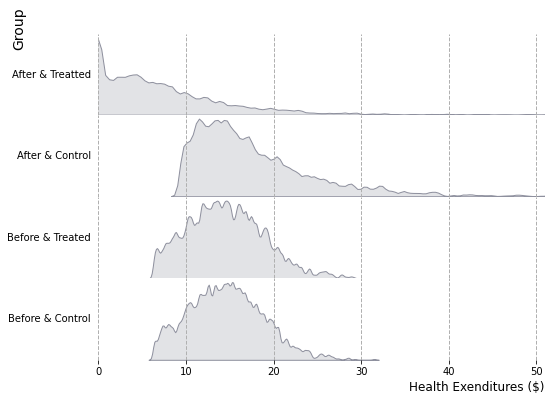

In [6]:
## Plot elemets
fig, ax = plt.subplots(4, 1, facecolor = "white", figsize = (8, 6))
fig.subplots_adjust(hspace = 0)

## Omit border lines
omit_all = ['right', 'top', 'left', 'bottom']
## ylabes for subplots
ylabels = [
    "After & Treatted", 
    "After & Control", 
    "Before & Treated", 
    "Before & Control"
]
## Plting density plots
sns.kdeplot(data = data1[data1.group == 1.1], x = "health_expenditures", fill = True,  bw_adjust = .2, ax = ax[0], color = "#8e909e")
sns.kdeplot(data = data1[data1.group == 0.1], x = "health_expenditures", fill = True,  bw_adjust = .2, ax = ax[1], color = "#8e909e")
sns.kdeplot(data = data1[data1.group == 1.0], x = "health_expenditures", fill = True,  bw_adjust = .2, ax = ax[2], color = "#8e909e")
sns.kdeplot(data = data1[data1.group == 0.0], x = "health_expenditures", fill = True,  bw_adjust = .2, ax = ax[3], color = "#8e909e")

## aesthetic
for i in range(4):
    # x limti
    ax[i].set_xlim(0, 51)
    # no overlap axis
    ax[i].tick_params(axis = "x", colors = "white")
    ax[i].tick_params(axis = "y", colors = "white")
    # no borderplots
    ax[i].spines[omit_all].set_visible(False)
    ax[i].axes.get_yaxis().set_ticks([])
    ax[i].axes.grid(linestyle = "--", linewidth = 1)
    # Horizontal ylabel
    ax[i].set_ylabel(ylabels[i], rotation = 0, horizontalalignment = 'right', verticalalignment='center')
    
# Text GROUP
fig.text(0, .85, "Group", ha = "right", rotation = "vertical", size = 14)

# Enable color for x axis
ax[3].tick_params("x", colors = "black")
# Set main xlabel
ax[3].set_xlabel("Health Exenditures ($)", loc = "right", size = 12)

## Density by rounds and by group with ridgelines

In [7]:
# Import data
data4 = pd.read_csv("https://raw.githubusercontent.com/d2cml-ai/python_visual_library/main/data/replicationJDE.csv")

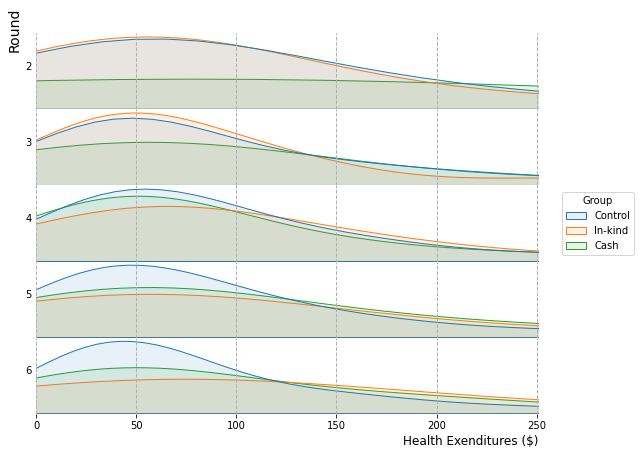

In [8]:
# Plots elements
fig, ax = plt.subplots(5, 1, facecolor = "white", figsize = (9, 7))
fig.subplots_adjust(hspace = 0)

# Omit vorders
omit_all = ['right', 'top', 'left', 'bottom']
# Labels as integer
ylabels = np.int_(np.arange(2, 6.1, 1))

# Density plots
sns.kdeplot(data = data4[data4.wave == 2], x = "realfinalprofit", common_norm = False, hue = "treatment_group", fill = True, alpha = .1, ax = ax[0], legend = False)
sns.kdeplot(data = data4[data4.wave == 3], x = "realfinalprofit", common_norm = False, hue = "treatment_group", fill = True, alpha = .1, ax = ax[1], legend = False)
sns.kdeplot(data = data4[data4.wave == 4], x = "realfinalprofit", common_norm = False, hue = "treatment_group", fill = True, alpha = .1, ax = ax[2], legend = True)
sns.kdeplot(data = data4[data4.wave == 5], x = "realfinalprofit", common_norm = False, hue = "treatment_group", fill = True, alpha = .1, ax = ax[3], legend = False)
sns.kdeplot(data = data4[data4.wave == 6], x = "realfinalprofit", common_norm = False, hue = "treatment_group", fill = True, alpha = .1, ax = ax[4], legend = False)

# subplots aesthetic
for i in range(5):
    ax[i].set_xlim(-.01, 251)
    ax[i].axes.get_yaxis().set_ticks([])
    ax[i].xaxis.grid(linestyle = "--", linewidth = 1)
    ax[i].tick_params('x', colors = "white")
    ax[i].tick_params('y', colors = "white")
    # No borders
    ax[i].spines[omit_all].set_visible(False)
    # y labels 
    ax[i].set_ylabel(ylabels[i], rotation = 0)

# main x ticks
ax[4].tick_params('x', colors = "black")
ax[4].set_xlabel("Health Exenditures ($)", loc = "right", size = 12)
# Tex y title
fig.text(.08, .85, "Round", ha = "left", rotation = "vertical", size = 14)
# Legend
sns.move_legend(ax[2], loc='right', ncol=1, bbox_to_anchor=(1.2, .5), title  = "Group")

## Count binwidth

In [9]:
# Import data
data = pd.read_csv("https://raw.githubusercontent.com/d2cml-ai/python_visual_library/main/data/desity_data.csv")
data = data.dropna(subset = ['theta_mle', 'roster_6a8'])
data['score'] = data.theta_mle - min(data.theta_mle)
data['bach'] =  data['roster_6a8']> 4
data.head(3)

,location_type,FACILITY_ID,DOCTOR_ID,facility,facilitycode,roster_6a8,theta_mle,score,bach
0,1,10101,1010101,NaN,1,4.0,1.754790,6.751990,False
1,1,10202,1020204,NaN,2,4.0,0.161093,5.158293,False
2,1,10303,1030301,NaN,3,4.0,-3.496340,1.500860,False


In [10]:
# Bins by count
bins_d = np.arange(-.00, 20,0.1) 
data["bins"] = pd.cut(data.score, bins_d)
data['count'] =  data.groupby(['bach', 'bins'])['score'].transform('size')

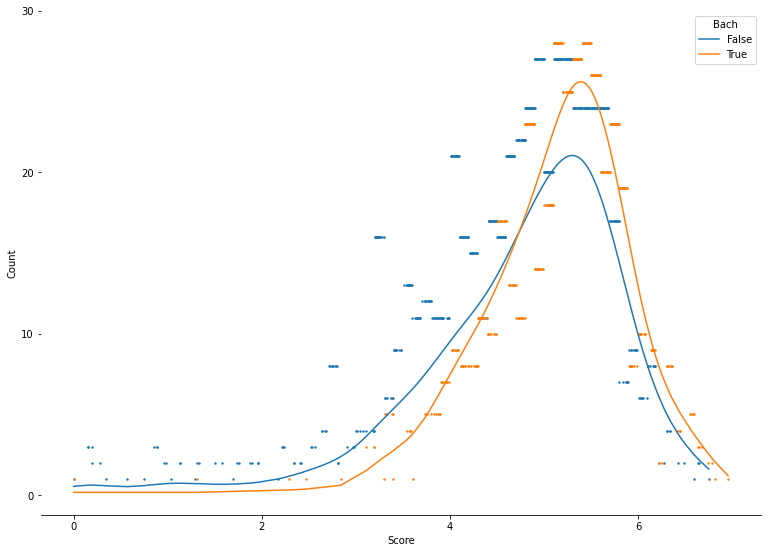

In [11]:
from scipy.stats import gaussian_kde

data = data.sort_values('score')
data0 = data[data.bach == 0]
data1 = data[data.bach == 1]

density1 = gaussian_kde(data1.score)
density0 = gaussian_kde(data.score)

# Plot elements
fig = plt.figure(figsize=(10, 7), facecolor="white")
ax = fig.add_axes([.1, 1, 1, 1])
# scatter
ax.scatter (x = "score", y = "count", data = data0, s = 2, label = "")
ax.scatter (x = "score", y = "count", data = data1, s = 2, label = "")
# line
ax.plot(data0.score, density0(data0.score) * 45, label = "False")
ax.plot(data1.score, density1(data1.score) * 45, label = "True")
# aesthetic
ax.set_xlabel("Score")
ax.set_ylabel("Count")
ax.set_yticks(np.arange(0, 31, 10))
ax.set_xticks(np.arange(0, 8, 2))
ax.legend(title = "Bach")
ax.spines[omit_all].set_visible(False)
ax.spines['bottom'].set_visible(True)
# plt.savefig("../figs/02density_05.png")